## **Installing Packages**

In [1]:
!pip install textblob
!pip install sentencepiece  
!pip install transformers
!pip install textstat
!pip install language-tool-python
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 58.2 MB/s 
     |████████████████████████████████| 182 kB 49.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.5 MB/s 
     |████████████████████████████████| 2.0 MB 29.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.9 MB/s 
  Cre

Restart Runtime after installing 

## **Importing Packages**

In [1]:
import re
import nltk 
import spacy
import textstat
import numpy as np
import pandas as pd
import seaborn as sn 
from textblob import Word
import matplotlib.pyplot as plt
import language_tool_python

from google.colab import files
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sentence_transformers import SentenceTransformer, util

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
tool = language_tool_python.LanguageTool('en-US')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
INFO:language_tool_python.download_lt:Unzipping /tmp/tmp6mlq5y_l.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


# **Reading Data From Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Data_Essay_01 = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet06.csv")
Data_Essay_01.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score
0,14834,There were many obstacles that the builders fa...,2.0,2.0,2.0
1,14835,"Him from the start, there would have been many...",3.0,3.0,3.0
2,14836,The builders of the Empire State Building face...,3.0,4.0,4.0
3,14837,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,1.0
4,14838,The builders of the Empire State Building face...,3.0,3.0,3.0


# **Feature Extraction**

## **Essay Pre Processing**

In [ ]:
def Remove_NER(Essay):
  """
    Removes Named Entity Recognition (NER) from each essay

    Args:
      Sentence: Essay of each student 
    
    Returns: 
      String

  """
  token = Essay.split()
  newTokens = []
  # print(token)
  for i in range(len(token)):
    if "@" in token[i]:
      if "," in token[i]:
        newTokens.append(",")
      elif "." in token[i]:
        newTokens.append(".")
      elif "!" in token[i]:
        newTokens.append("!")
    else:
      newTokens.append(token[i])

  return " ".join(newTokens)
  # return ' '.join (word for word in Essay.split(' ') if not word.startswith('@'))
def Remove_NER2(Essay):
    return ' '.join (word for word in Essay.split(' ') if not word.startswith('@'))
def Remove_Punctuations(sentence):
  """
    Removes punctuations from text
    Args:
      sentence: Essay of each student
    
    Returns: 
      String
  """
  punctuations = '''!()-[]{};:"\,/'<>.?@#$%^&*_~'''
  newSentence = ""
  for word in sentence:
      if (word in punctuations):
          newSentence = newSentence + " "
      else: 
          newSentence = newSentence + word
  return newSentence

def LowerCase_Words(Essay):
  """
    Lower case all the words in an essay

    Args:
      Sentence: Essay of each student
    
    Returns: 
      String
  """
  return re.sub('[0-9]+','', Essay).lower() 

def Tokenize_Essay(Essay):
    """
      Create Tokens of each Essay

      Args:
        Essay: Essay of each student
      
      Returns: 
        String
    """
    Preprocessed = Remove_Punctuations(Essay)
    return " ".join(word_tokenize(Preprocessed))

def Remove_White_Spaces(Essay):
  """
    Removes Extra White Spaces

    Args:
      Essay: Essay of each student
    
    Returns: 
      String
  """
  return " ".join(Essay.split())

def Remove_Special_Characters(Essay):
  """
    Removes Special Characters from Essay

    Args:
      Essay: Essay of each student
    
    Returns: 
      String
  """
  new_text = re.sub(r"[^a-zA-Z0-9 ]", "", Essay)
  return new_text

## **Basic Count Features**

This section will cover:


*   Counting Sentences per Essay
*   Counting Words per Essay
*   Counting Characters per Essay
*   Average Words per Essay
*   Counting Syllables
*   Percentage Of Hard Words




#### Counting Sentences per Essay

In [ ]:
def Sentence_Count(Essay):
    """
    Counts sentences in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int
  """
    sentence_no = nltk.sent_tokenize(Essay)
    return len(sentence_no)

In [ ]:
Data_Essay_01['Sent_Count'] = Data_Essay_01['Essay'].apply(Sentence_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count
1056,15890,When the builders of the Empire state Building...,3.0,1.0,2.0,9


#### Counting Words per Essay

**Observation:** These word count are more than the original count coz of nltk tokenization. Punctations are treated as seperate words.


In [ ]:
def Word_Count(Essay):
  """
    Counts words in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int  
  """ 
  word_no = nltk.word_tokenize(Essay)
  return len(word_no)

In [ ]:
Data_Essay_01['Word_Count'] = Data_Essay_01['Essay'].apply(Word_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count
464,15298,When the architects and builders were planning...,1.0,2.0,2.0,7,127


#### Counting Characters per Essay

In [ ]:
def Char_Count(Essay):
  """
    Counts characters in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int
  """
  return len([character for character in Essay])

In [ ]:
Data_Essay_01['Char_Count'] = Data_Essay_01['Essay'].apply(Char_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count
568,15402,The obstacles the builders of the Empire State...,0.0,1.0,1.0,5,126,633


#### Average Word Length of Essay

In [ ]:
def Avg_Word_Count(Essay):
  """
    Calculates Average Word Count In An Essay Set

    Args:
      Essay: Essay of each student 
    
    Returns: 
      float
      
  """
  word_list = nltk.word_tokenize(Essay)
  total = sum(map(len, word_list))/len(word_list)
  return total

In [ ]:
Data_Essay_01['Avg_Word_Count'] = Data_Essay_01['Essay'].apply(Avg_Word_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count
1222,16056,Architects and builders faced several obstacle...,3.0,3.0,3.0,10,173,895,4.323699


#### Average Sentence Length of Essay

In [ ]:
def Average_Sentence_Length(Word_Count,Sent_Count):
  
  average_sentence_length = float(Word_Count / Sent_Count)
  return average_sentence_length

In [ ]:
Data_Essay_01['Avg_Sentence_Length']=Data_Essay_01.apply(lambda row :Average_Sentence_Length(row["Word_Count"],row["Sent_Count"]),axis=1)

#### Counting Syllables
       Primarily used in Readability scores.

In [ ]:
def Syllable_Count(text):
  return textstat.syllable_count(text, lang='en_US')

In [ ]:
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Essay'].apply(Remove_NER)
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Preprocessed_Essay'].apply(Tokenize_Essay)
Data_Essay_01["Syllable_Count"] = Data_Essay_01['Preprocessed_Essay'].apply(Syllable_Count)

#### Percentage of Difficult Words
    Primarily used in Readability scores.
    Execution Time: 30 mins +




In [ ]:
def Difficult_Words_Count(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    # Find all words in the text
    words = []
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        tokens=nltk.word_tokenize(sentence)
        for token in tokens:
          words.append(token)

    # difficult words are those with syllables >= 2 ,Easy words are provided by textstat library.
    diff_words_set = set()

    #Syllabes are those words which have a break in between for example , book has a single syllable while reading has two.
    for word in words:
      syllable_count=Syllable_Count(word)
      if word not in nlp.Defaults.stop_words and syllable_count >= 2:
            diff_words_set.add(word)
 
    return len(diff_words_set)

In [ ]:
# Data_Essay_01["Difficult_Word_Count"] = Data_Essay_01["Preprocessed_Essay"].apply(Difficult_Words_Count)
Data_Essay_01["Difficult_Word_Count"] = Data_Essay_01["Preprocessed_Essay"].map(Difficult_Words_Count)

## **Parts Of Speech Counts**

This section will cover:


*   Counting Nouns per Essay
*   Counting Adjectives per Essay
*   Counting Proper Nouns per Essay
*   Counting Adverbs per Essay
*   Counting Conjunctions per 

```
Execution Time: 2 minutes
```

Removing NERs, Punctuations and Lower Casing

In [ ]:
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Essay'].apply(Remove_NER)
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Preprocessed_Essay'].apply(Tokenize_Essay)
Data_Essay_01.head()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Avg_Sentence_Length,Preprocessed_Essay,Syllable_Count,Difficult_Word_Count
0,14834,There were many obstacles that the builders fa...,2.0,2.0,2.0,6,134,694,4.276119,22.333333,There were many obstacles that the builders fa...,176,24
1,14835,"Him from the start, there would have been many...",3.0,3.0,3.0,9,201,1052,4.343284,22.333333,Him from the start there would have been many ...,255,35
2,14836,The builders of the Empire State Building face...,3.0,4.0,4.0,8,180,938,4.294444,22.500000,The builders of the Empire State Building face...,235,34
3,14837,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,1.0,7,213,1098,4.262911,30.428571,In the passage The Mooring Mast by Marcia Amid...,274,36
4,14838,The builders of the Empire State Building face...,3.0,3.0,3.0,10,176,929,4.375000,17.600000,The builders of the Empire State Building face...,241,34


In [ ]:
def Pos_Tag_Count(Essay):
  """
    Counts Parts of Speech in an Essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int,int,int,int,int,int    
  """
  tagged_doc = nlp(Essay)

  adj_count=0
  verb_count=0
  noun_count=0
  pNoun_count=0
  adverb_count=0
  conj_count=0

  for token in tagged_doc:

    if(token.pos_ == 'ADJ'):
      adj_count+=1
    
    elif(token.pos_ =='NOUN'):
      noun_count+=1

    elif (token.pos_ =='PRON'):
      pNoun_count+=1

    elif (token.pos_ =='VERB'):
      verb_count+=1

    elif (token.pos_ =='ADV'):
      adverb_count+=1
    
    elif(token.pos_=='CCONJ'):
      conj_count+=1

  return verb_count,noun_count, adj_count, conj_count, adverb_count,pNoun_count

In [ ]:
Data_Essay_01['Verb_Count'], Data_Essay_01['Noun_Count'], Data_Essay_01['Adj_Count'], Data_Essay_01['Conj_Count'], Data_Essay_01['Adverb_Count'], Data_Essay_01['pNoun_Count']=zip(*Data_Essay_01["Preprocessed_Essay"].map(Pos_Tag_Count))
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Avg_Sentence_Length,Preprocessed_Essay,Syllable_Count,Difficult_Word_Count,Verb_Count,Noun_Count,Adj_Count,Conj_Count,Adverb_Count,pNoun_Count
212,15046,The builders of the Empire State Building were...,4.0,4.0,4.0,13,243,1277,4.403292,18.692308,The builders of the Empire State Building were...,316,50,32,42,16,5,10,4


In [ ]:
Data_Essay_01.to_csv("Output_1.csv")
files.download('/content/Output_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Evaluating Writing Attributes**

This section will cover:


*   Style
*   Content
*   Semantic
*   Semantic Coherence & Consistency 
*   Connectivity
*   Readibility Scores


### **Style**

This section will cover:


*   Mechanics
*   Grammar
*   Lexical Sophistication



#### **Mechanics**

This section will cover:


*   Counting Spelling Mistakes
*   Correcting Spelling Mistakes
*   Checking Punctuations
*   Counting Punctuations
*   Checking Capitalization



##### Counting Spelling Mistakes


```
Execution Time: 30 mins +
```



In [ ]:
def Check_Spelling(Sentence):
  """
    Checks spelling of each word

    Args:
      word: Words (Tokens) of each essay 
    
    Returns: 
      int
  """
  count = 0
  Sentence = word_tokenize(Sentence)
  for word in Sentence:
    word = Word(word)
  
    result = word.spellcheck()

    # result [0][0] contains the bool value if the spelling is correct or not
    # result [0][1] contains the confidence for the suggest correct spelling

    if word != result[0][0]:
      if(result[0][1] > 0.9 and not(wordnet.synsets(word)) and not("/" in word) and not (word == "If" or word == "if")):
        count = count + 1
        
  return count

In [ ]:
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Essay"].apply(Remove_NER)

In [ ]:
# Data_Essay_01["Spelling_Mistakes_Count"] = Data_Essay_01["Preprocessed_Essay"].map(Check_Spelling)
Data_Essay_01["Spelling_Mistakes_Count"] = Data_Essay_01["Preprocessed_Essay"].apply(Check_Spelling)

##### Correcting Spelling Mistakes via LanguageTool
     This is for Grammer

In [ ]:
def Spelling_Error_Correct(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'GRAMMAR'
    matches = [rule for rule in matches if not is_bad_rule(rule)]
    # print(matches[0].category)
    language_tool_python.utils.correct(essays, matches)   # to correct it
    return essays

In [ ]:
Data_Essay_01["Without_White_Spaces"] = Data_Essay_01["Essay"].apply(Remove_White_Spaces)
Data_Essay_01['Essay_SpellingCorrected_LT'] = Data_Essay_01['Without_White_Spaces'].apply(Spelling_Error_Correct)

##### Counting Number Of Punctuations

In [ ]:
def Count_Punctuations(Essay):
  """
    Counts Punctuations used in an Essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int,int,int,int,int
      
  """
  count_fullstops = 0
  count_exclamation = 0
  count_comma = 0
  count_hyphens = 0
  count_questionmark = 0

  tokens = word_tokenize(Essay)

  for word in tokens:
    if word == ".":
      count_fullstops += 1
    elif word == "!":
      count_exclamation += 1
    elif word == "?":
      count_questionmark += 1
    elif word == ",":
      count_comma += 1
    elif word == "-":
      count_hyphens += 1

  return count_fullstops , count_exclamation , count_comma , count_questionmark , count_hyphens

In [ ]:
Data_Essay_01["Count_Fullstops"] , Data_Essay_01["Count_Exclamation"] , Data_Essay_01["Count_Comma"] , Data_Essay_01["Count_Questionmark"] , Data_Essay_01["Count_Hyphens"] = zip(*Data_Essay_01["Essay"].map(Count_Punctuations))
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Avg_Sentence_Length,...,Adverb_Count,pNoun_Count,Spelling_Mistakes_Count,Without_White_Spaces,Essay_SpellingCorrected_LT,Count_Fullstops,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens
85,14919,In order to allow dirigibles to dock on the ro...,2.0,2.0,2.0,6,135,699,4.296296,22.5,...,11,1,1,In order to allow dirigibles to dock on the ro...,In order to allow dirigibles to dock on the ro...,6,0,9,0,0


##### Checking Capitalization Mistakes

In [ ]:
def Check_Capitalization(Essay):
  """
    Checks capitalization in each sentence of an essay

    Args:
    Essay: Words (Tokens) of each essay 

    Returns: 
    int

  """
  count = 0

  words = Essay.split()
  alreadyCounted_Words = []
  
  for i in range(len(words) - 1):
    if (i == 0):                                                    # Checking Capital Letter at the start of Sentence
      if words[i] != words[i].title():
        alreadyCounted_Words.append(words[i])
        count = count + 1
    elif "@" in words[i]:
      continue
    elif words[i] == '.' or words[i] == '"':                         # Checking Capital Letters in start of every sentence & start of every quote
      match = words[i+1]
      if match != words[i+1].title():
        alreadyCounted_Words.append(words[i])
        count = count + 1
        i = i + 1
    
    # Check if capital in middle 
    
  # Checking if all proper nouns are capital or not

  tagged_sent = nlp(Essay)

  for i in range(len(tagged_sent)):
    if tagged_sent[i].pos_ == "PROPN":
      # print(tagged_sent[i]) 
      word = tagged_sent[i].text 
      if word in alreadyCounted_Words:
        alreadyCounted_Words.remove(word)
      elif word != word.title():
        count = count + 1

  return count

In [ ]:
Data_Essay_01["Preprocessed_Essay"] =  Data_Essay_01["Essay"].apply(Remove_NER)
Data_Essay_01["Capitalization_Errors"] = Data_Essay_01["Preprocessed_Essay"].apply(Check_Capitalization)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Avg_Sentence_Length,...,pNoun_Count,Spelling_Mistakes_Count,Without_White_Spaces,Essay_SpellingCorrected_LT,Count_Fullstops,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens,Capitalization_Errors
727,15561,"In the excerpt from ""The Mooring Mast"" by Marc...",3.0,4.0,4.0,11,325,1766,4.541538,29.545455,...,15,0,"In the excerpt from ""The Mooring Mast"" by Marc...","In the excerpt from ""The Mooring Mast"" by Marc...",11,1,8,0,0,0


In [ ]:
Data_Essay_01.to_csv("Output_2.csv")
files.download('/content/Output_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Checking Punctuation Mistakes **(Incomplete)**



In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification , pipeline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('oliverguhr/fullstop-punctuation-multilang-large')
model = AutoModelForTokenClassification.from_pretrained('oliverguhr/fullstop-punctuation-multilang-large')
pun = pipeline('ner' , model = model , tokenizer = tokenizer)

In [ ]:
tags = pun(text)

Updated_string = ''

for output in tags:
  result = output['word'].replace('▁' , ' ') + output['entity'].replace('0', '')
  Updated_string += result

Updated_string

In [ ]:
def Punctuation_Errors(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'PUNCTUATION'
    matches = [rule for rule in matches if is_bad_rule(rule)]
    return len(matches)

In [ ]:
Data_Essay_01["Without_White_Spaces"] = Data_Essay_01["Essay"].apply(Remove_White_Spaces)

In [ ]:
Data_Essay_01["Punctuation_Errors"] = Data_Essay_01["Without_White_Spaces"].apply(Punctuation_Errors)

#### **Grammar Error Detection**

In [ ]:
df1 = Data_Essay_01[['Essay_SpellingCorrected_LT', 'Sent_Count']]
df1.head()

,Essay_SpellingCorrected_LT,Sent_Count
0,There were many obstacles that the builders fa...,6
1,"Him from the start, there would have been many...",9
2,The builders of the Empire State Building face...,8
3,In the passage The Mooring Mast by Marcia Amid...,7
4,The builders of the Empire State Building face...,10


In [ ]:
def Grammar_Errors(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'GRAMMAR'
    matches = [rule for rule in matches if is_bad_rule(rule)]
    errors = []
    #language_tool_python.utils.correct(text, matches)   # to correct it
    for i in range(0, len(matches)):
      errors.append(matches[i].ruleId)  # or category of the error (Misc, Whitespace, Typography)
    return len(matches), errors

In [ ]:
Data_Essay_01['Grammar_Error_Count'], Data_Essay_01['Grammar_Error_List'] = zip(*df1['Essay_SpellingCorrected_LT'].map(Grammar_Errors))

In [ ]:
Data_Essay_01.columns

Index(['ID', 'Essay', 'Rater_1 Score', 'Rater_2 Score', 'Total Score',
       'Sent_Count', 'Word_Count', 'Char_Count', 'Avg_Word_Count',
       'Avg_Sentence_Length', 'Preprocessed_Essay', 'Syllable_Count',
       'Difficult_Word_Count', 'Verb_Count', 'Noun_Count', 'Adj_Count',
       'Conj_Count', 'Adverb_Count', 'pNoun_Count', 'Spelling_Mistakes_Count',
       'Without_White_Spaces', 'Essay_SpellingCorrected_LT', 'Count_Fullstops',
       'Count_Exclamation', 'Count_Comma', 'Count_Questionmark',
       'Count_Hyphens', 'Capitalization_Errors', 'Grammar_Error_Count',
       'Grammar_Error_List'],
      dtype='object')

In [ ]:
print(Data_Essay_01['Grammar_Error_List'].explode().value_counts())

GOING_TO_JJ                              78
OVER_COMPOUNDS                           39
AIRCRAFTS                                36
MD_BASEFORM                              30
A_NNS                                    26
                                         ..
MISSING_TO_BEFORE_A_VERB                  1
IF_YOU_ANY                                1
HOW_COMPOUNDS                             1
AUXILIARY_DO_WITH_INCORRECT_VERB_FORM     1
SINGULAR_VERB_AFTER_THESE_OR_THOSE        1
Name: Grammar_Error_List, Length: 122, dtype: int64


#### **Lexical Sophistication** (Incomplete)

In [ ]:
pip install taaled
#RESOURCES FOR LEXICAL SOPHISTICATION 
#https://eli-data-mining-group.github.io/Pitt-ELI-Corpus/publications/Naismith_2019.pdf
#https://pypi.org/project/taaled/
#https://github.com/LCR-ADS-Lab/pylats

### **Content**

This section will cover:


*   Latent Semantic Analysis (LSA)


#### **Latent Semantic Analysis (LSA)** (Incomplete)

Content analysis generally implies only a high-level semantic analysis and comparison with source text and graded essays

### **Semantic Similarity with Sentence Transformer**

1. First, we convert the two texts into individual vector representations
2. Then, we used a metric like cosine similarity to determine the similarity between the two vectors we're comparing.

https://www.vennify.ai/semantic-similarity-sentence-transformers/

```
Execution Time: 27 minutes
```



In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
def Extract_Sentences(Essay):
  sentences = sent_tokenize(Essay)
  return sentences

def Compute_Cosine_Similarity(Sentences):
  Cosine_Similarities = []
  for i in range(len(Sentences) - 1):
      Cosine_Similarities.append(util.cos_sim(model.encode(Sentences[i]) , model.encode(Sentences[i+1])))
  
  if len(Cosine_Similarities) > 0:
    Average = sum(Cosine_Similarities) / len(Cosine_Similarities)
    return Average
  else:
    return 0

In [ ]:
Sentences = Extract_Sentences(Data_Essay_01["Essay"][2])
print(float(Compute_Cosine_Similarity(Sentences)))

0.3084096908569336


In [ ]:
Data_Essay_01.head()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Avg_Sentence_Length,...,Without_White_Spaces,Essay_SpellingCorrected_LT,Count_Fullstops,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens,Capitalization_Errors,Grammar_Error_Count,Grammar_Error_List
0,14834,There were many obstacles that the builders fa...,2.0,2.0,2.0,6,134,694,4.276119,22.333333,...,There were many obstacles that the builders fa...,There were many obstacles that the builders fa...,6,0,4,0,0,0,0,[]
1,14835,"Him from the start, there would have been many...",3.0,3.0,3.0,9,201,1052,4.343284,22.333333,...,"Him from the start, there would have been many...","Him from the start, there would have been many...",9,0,10,0,0,0,1,[PRP_JJ]
2,14836,The builders of the Empire State Building face...,3.0,4.0,4.0,8,180,938,4.294444,22.500000,...,The builders of the Empire State Building face...,The builders of the Empire State Building face...,8,0,3,0,0,0,1,[THERE_WAS_MANY]
3,14837,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,1.0,7,213,1098,4.262911,30.428571,...,In the passage The Mooring Mast by Marcia Amid...,In the passage The Mooring Mast by Marcia Amid...,6,0,4,0,0,0,2,"[WORLDS_BEST, THE_SUPERLATIVE]"
4,14838,The builders of the Empire State Building face...,3.0,3.0,3.0,10,176,929,4.375000,17.600000,...,The builders of the Empire State Building face...,The builders of the Empire State Building face...,10,0,2,0,0,0,0,[]


In [ ]:
Data_Essay_01["Sentences_Tokenized"] = Data_Essay_01["Essay"].apply(Extract_Sentences)

In [ ]:
# Data_Essay_01["Semantic_Similarity"] = Data_Essay_01['Sentences_Tokenized'].apply(Compute_Cosine_Similarity)
Data_Essay_01["Semantic_Similarity"] = Data_Essay_01['Sentences_Tokenized'].map(Compute_Cosine_Similarity)

In [ ]:
Data_Essay_01.sample

<bound method NDFrame.sample of          ID                                              Essay  Rater_1 Score  \
0     14834  There were many obstacles that the builders fa...            2.0   
1     14835  Him from the start, there would have been many...            3.0   
2     14836  The builders of the Empire State Building face...            3.0   
3     14837  In the passage The Mooring Mast by Marcia Amid...            1.0   
4     14838  The builders of the Empire State Building face...            3.0   
...     ...                                                ...            ...   
1795  16629  The one obstacle the builders had when trying ...            2.0   
1796  16630  Some of the problems with the constructing of ...            1.0   
1797  16631  The builders of the Empire State building face...            2.0   
1798  16632  The obstacles the builders of the Empire State...            2.0   
1799  16633  You want me to tell you what they had to go th...            2.0

In [ ]:
Data_Essay_01["Semantic_Similarity"] = Data_Essay_01["Semantic_Similarity"].astype(float)

In [ ]:
Data_Essay_01.to_csv("Output_3.csv")
files.download('/content/Output_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Connectivity**

In [ ]:
# Step01: Making a temp dataframe for sepearte preprocessing of connectors
df_connectors = Data_Essay_01[['Essay', 'Sent_Count']]
df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Essay'].apply(LowerCase_Words)  # for ease in matching
df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(Remove_NER) # no impact on connectors count, removing it to save computational time.
df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(Remove_White_Spaces) # for ease in ngrams
df_connectors.head()

<ipython-input-120-451bee7a96ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Essay'].apply(LowerCase_Words)  # for ease in matching
<ipython-input-120-451bee7a96ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(Remove_NER) # no impact on connectors count, removing it to save computational time.
<ipython-input-120-451bee7a96e

,Essay,Sent_Count,Preprocessed_Essay_For_Connectors
0,There were many obstacles that the builders fa...,6,there were many obstacles that the builders fa...
1,"Him from the start, there would have been many...",9,"him from the start, there would have been many..."
2,The builders of the Empire State Building face...,8,the builders of the empire state building face...
3,In the passage The Mooring Mast by Marcia Amid...,7,in the passage the mooring mast by marcia amid...
4,The builders of the Empire State Building face...,10,the builders of the empire state building face...


In [ ]:
#Step02: Generating n_grams of each essay. 
def generate_N_grams(essay,ngram=1):
  words=[word for word in essay.split(" ")]  
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ngram_list=[' '.join(ngram) for ngram in temp]
  return ngram_list

In [ ]:
df_connectors['Unigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =1)
df_connectors['Bigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =2)
df_connectors['Trigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =3)
df_connectors['Four-grams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =4)
df_connectors['Five-grams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =5)

<ipython-input-122-40f8145c1a78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connectors['Unigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =1)
<ipython-input-122-40f8145c1a78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connectors['Bigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =2)
<ipython-input-122-40f8145c1a78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [ ]:
df_connectors['Four-grams'][17]

['the builders of the',
 'builders of the empire',
 'of the empire state',
 'the empire state buildings',
 'empire state buildings had',
 'state buildings had many',
 'buildings had many problems',
 'had many problems in',
 'many problems in allowing',
 'problems in allowing dirigibles',
 'in allowing dirigibles to',
 'allowing dirigibles to dock',
 'dirigibles to dock there.',
 'to dock there. things',
 'dock there. things such',
 'there. things such as',
 'things such as the',
 'such as the wind,',
 'as the wind, the',
 'the wind, the actual',
 'wind, the actual docking,',
 'the actual docking, and',
 'actual docking, and the',
 'docking, and the people',
 'and the people getting',
 'the people getting off',
 'people getting off safely.',
 'getting off safely. the',
 'off safely. the actual',
 'safely. the actual docking',
 'the actual docking was',
 'actual docking was impractical',
 'docking was impractical it',
 'was impractical it would',
 'impractical it would be',
 'it would be

In [ ]:
# Step03: Loading the file of connectors.
filename = "/content/drive/MyDrive/IntelliTech-DataSet/Connectors_Words.txt"
with open(filename) as file:
    defined_connectors = [line.rstrip() for line in file]

defined_connectors = set(defined_connectors)  #remove duplicate connectors
print(len(defined_connectors))

312


In [ ]:
# Step 04: Make a connector detection function

def connectors_detection(unigrams_list, bigram_list, trigram_list, four_grams_list, five_grams_list):
  connectors_detected = []
  for token in unigrams_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in bigram_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in trigram_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in four_grams_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in five_grams_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  
  #use SET connectors_detected for tf-idf work, unique connectors
  return set(connectors_detected)
  #return len(connectors_detected)

In [ ]:
df_connectors['Connectors'] = df_connectors.apply(lambda row: connectors_detection(row['Unigrams'], row['Bigrams'],row['Trigrams'],row['Four-grams'],row['Five-grams']),axis = 1)

<ipython-input-126-c76e0b4b0128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connectors['Connectors'] = df_connectors.apply(lambda row: connectors_detection(row['Unigrams'], row['Bigrams'],row['Trigrams'],row['Four-grams'],row['Five-grams']),axis = 1)


In [ ]:
df_connectors.head()

,Essay,Sent_Count,Preprocessed_Essay_For_Connectors,Unigrams,Bigrams,Trigrams,Four-grams,Five-grams,Connectors
0,There were many obstacles that the builders fa...,6,there were many obstacles that the builders fa...,"[there, were, many, obstacles, that, the, buil...","[there were, were many, many obstacles, obstac...","[there were many, were many obstacles, many ob...","[there were many obstacles, were many obstacle...","[there were many obstacles that, were many obs...","{while, to, there, for, but, down, and, over, ..."
1,"Him from the start, there would have been many...",9,"him from the start, there would have been many...","[him, from, the, start,, there, would, have, b...","[him from, from the, the start,, start, there,...","[him from the, from the start,, the start, the...","[him from the start,, from the start, there, t...","[him from the start, there, from the start, th...","{while, to, as, from, there, here, about, belo..."
2,The builders of the Empire State Building face...,8,the builders of the empire state building face...,"[the, builders, of, the, empire, state, buildi...","[the builders, builders of, of the, the empire...","[the builders of, builders of the, of the empi...","[the builders of the, builders of the empire, ...","[the builders of the empire, builders of the e...","{while, to, since, last, there, up, or, for, d..."
3,In the passage The Mooring Mast by Marcia Amid...,7,in the passage the mooring mast by marcia amid...,"[in, the, passage, the, mooring, mast, by, mar...","[in the, the passage, passage the, the mooring...","[in the passage, the passage the, passage the ...","[in the passage the, the passage the mooring, ...","[in the passage the mooring, the passage the m...","{to, from, there, for, or, after, but, because..."
4,The builders of the Empire State Building face...,10,the builders of the empire state building face...,"[the, builders, of, the, empire, state, buildi...","[the builders, builders of, of the, the empire...","[the builders of, builders of the, of the empi...","[the builders of the, builders of the empire, ...","[the builders of the empire, builders of the e...","{due to, to, for, up, there, around, too, even..."


The minimum value that the index may generate is 0. There is no specified maximum limit on the index. Zero (0) denotes no connector at all, while an index close to 2 shows that there are many effective connectors in (almost) every sentence. The connectivity index is calculated for each essay.

In [ ]:
# Optimizing connectors via TF-IDF

def TF(essay,connectors):
  freq = 0
  for word in essay.split(" "):
    if word in connectors:
      freq = freq + 1
  return freq

def IDF(essay,connector):
  doc = 0;
  sent_list = nltk.tokenize.sent_tokenize(essay)
  for i in range(0, len(sent_list)):
    if connector in sent_list[i]:
      doc = doc + 1
  return 1+ np.log(len(sent_list) / (doc))

def TF_IDF(essay, connector):
  tf = TF(essay,connector)
  idf = IDF(essay,connector)
  tf_idf = tf * idf
  return tf_idf

def connectivity_index(essay, connectors,num_sent):
  weights = []
  for word in connectors:
    score = TF_IDF(essay,word)
    weights.append(score)
  return float(sum(weights) / num_sent)

Data_Essay_01['Connectivity_Index'] = df_connectors.apply(lambda row: connectivity_index(row['Preprocessed_Essay_For_Connectors'], row['Connectors'], row['Sent_Count']), axis=1)


In [ ]:
df_connectors.head()

,Essay,Sent_Count,Preprocessed_Essay_For_Connectors,Unigrams,Bigrams,Trigrams,Four-grams,Five-grams,Connectors
0,There were many obstacles that the builders fa...,6,there were many obstacles that the builders fa...,"[there, were, many, obstacles, that, the, buil...","[there were, were many, many obstacles, obstac...","[there were many, were many obstacles, many ob...","[there were many obstacles, were many obstacle...","[there were many obstacles that, were many obs...","{while, to, there, for, but, down, and, over, ..."
1,"Him from the start, there would have been many...",9,"him from the start, there would have been many...","[him, from, the, start,, there, would, have, b...","[him from, from the, the start,, start, there,...","[him from the, from the start,, the start, the...","[him from the start,, from the start, there, t...","[him from the start, there, from the start, th...","{while, to, as, from, there, here, about, belo..."
2,The builders of the Empire State Building face...,8,the builders of the empire state building face...,"[the, builders, of, the, empire, state, buildi...","[the builders, builders of, of the, the empire...","[the builders of, builders of the, of the empi...","[the builders of the, builders of the empire, ...","[the builders of the empire, builders of the e...","{while, to, since, last, there, up, or, for, d..."
3,In the passage The Mooring Mast by Marcia Amid...,7,in the passage the mooring mast by marcia amid...,"[in, the, passage, the, mooring, mast, by, mar...","[in the, the passage, passage the, the mooring...","[in the passage, the passage the, passage the ...","[in the passage the, the passage the mooring, ...","[in the passage the mooring, the passage the m...","{to, from, there, for, or, after, but, because..."
4,The builders of the Empire State Building face...,10,the builders of the empire state building face...,"[the, builders, of, the, empire, state, buildi...","[the builders, builders of, of the, the empire...","[the builders of, builders of the, of the empi...","[the builders of the, builders of the empire, ...","[the builders of the empire, builders of the e...","{due to, to, for, up, there, around, too, even..."


In [ ]:
Data_Essay_01['Connectivity_Index'].describe()

count    1800.000000
mean       17.828756
std         9.824750
min         0.000000
25%        10.781369
50%        16.359319
75%        23.221213
max        74.965543
Name: Connectivity_Index, dtype: float64

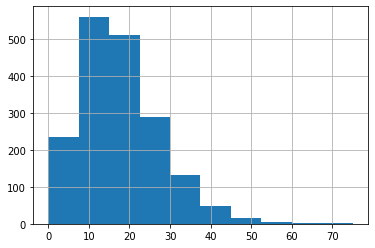

In [ ]:
Data_Essay_01['Connectivity_Index'].hist()

In [ ]:
Data_Essay_01.to_csv("Output_4.csv")
files.download('/content/Output_4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Readibility Scores**

We section will cover:
1.   Flesch Reading Ease
2.   Flesch-Kincaid Grade Level
3.   Gunning Fog Index
4.   Dale Chall Readability Formula

In [ ]:
#Required Pre-processing for Readability Scores.
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Essay"].apply(Remove_NER2)
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Preprocessed_Essay"].apply(LowerCase_Words)

In [ ]:
Data_Essay_01.head()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Avg_Sentence_Length,...,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens,Capitalization_Errors,Grammar_Error_Count,Grammar_Error_List,Sentences_Tokenized,Semantic_Similarity,Connectivity_Index
0,14834,There were many obstacles that the builders fa...,2.0,2.0,2.0,6,134,694,4.276119,22.333333,...,0,4,0,0,0,0,[],[There were many obstacles that the builders f...,0.273268,14.757424
1,14835,"Him from the start, there would have been many...",3.0,3.0,3.0,9,201,1052,4.343284,22.333333,...,0,10,0,0,0,1,[PRP_JJ],"[Him from the start, there would have been man...",0.274427,22.894405
2,14836,The builders of the Empire State Building face...,3.0,4.0,4.0,8,180,938,4.294444,22.500000,...,0,3,0,0,0,1,[THERE_WAS_MANY],[The builders of the Empire State Building fac...,0.308410,27.225275
3,14837,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,1.0,7,213,1098,4.262911,30.428571,...,0,4,0,0,0,2,"[WORLDS_BEST, THE_SUPERLATIVE]",[In the passage The Mooring Mast by Marcia Ami...,0.272812,23.906536
4,14838,The builders of the Empire State Building face...,3.0,3.0,3.0,10,176,929,4.375000,17.600000,...,0,2,0,0,0,0,[],[The builders of the Empire State Building fac...,0.271680,19.473329


### Flesch Reading Ease Score
    In the Flesch reading-ease test, higher scores indicate material that is easier to read; lower numbers mark passages that are more difficult to read

In [ ]:
def Flesch_Reading_Ease_Score(syllable_Count,NoOfsentences,total_Words):
  return (206.835-1.015*(total_Words/float(NoOfsentences))-84.6*(syllable_Count / float(total_Words)))

In [ ]:
Data_Essay_01['Flesch_Reading_Ease_Score']=Data_Essay_01.apply(lambda row :Flesch_Reading_Ease_Score(row["Syllable_Count"],row["Sent_Count"],row["Word_Count"]),axis=1)

### Flesch-Kincaid Grade
    Used extensively in educational fields.
  
    It can also mean the number of years of education generally required to understand this text, relevant when the formula results in a number greater than 10.
    
    For example, a score of 9.3 means that a ninth grader would be able to read the document.






In [ ]:
def Flesh_Kincaid_Grade(total_Words,total_Sentences,syllable_Count):
   F = float(0.39 * (total_Words / total_Sentences) + 11.8 * (syllable_Count / float(total_Words)) - 15.59)
   return F

In [ ]:
Data_Essay_01['Flesh_Kincaid_Grade']=Data_Essay_01.apply(lambda row :Flesh_Kincaid_Grade(row["Syllable_Count"],row["Sent_Count"],row["Word_Count"]),axis=1)

###[Dale-Chall Readability Score](https://www.kaggle.com/code/fshenbayh/readability)
    Provides a numeric gauge of the comprehension difficulty that readers come upon when reading a text
    For example , if score is 4.9 or lower then text is understood by average 4th grade student or lower.







In [ ]:
#Raw score = 0.1579*(PDW) + 0.0496*(ASL) if the percentage of PDW is less than 5%, otherwise compute
#Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365  

def Dale_Challl_Readability_Score(word_Count ,difficult_Words,avg_sent_length):
    NOT_DIFFICULT_WORDS = word_Count - difficult_Words
    if(word_Count >0):
      # Percentage of words not on difficult word list

      percent_Not_Difficult_Words = float(NOT_DIFFICULT_WORDS) / float(word_Count) * 100
        # diff_words stores percentage of difficult words
    diff_words = 100 - percent_Not_Difficult_Words
    Dale_Chall_Score = (0.1579 * diff_words) +  (0.0496 * avg_sent_length)
    if diff_words > 5:      
 
        Dale_Chall_Score += 3.6365
         
    return Dale_Chall_Score

In [ ]:
Data_Essay_01['Dale_Challl_Readability_Score']=Data_Essay_01.apply(lambda row :Dale_Challl_Readability_Score(row["Word_Count"],row["Difficult_Word_Count"],row["Avg_Sentence_Length"]),axis=1)

In [ ]:
Data_Essay_01.sample

<bound method NDFrame.sample of          ID                                              Essay  Rater_1 Score  \
0     14834  There were many obstacles that the builders fa...            2.0   
1     14835  Him from the start, there would have been many...            3.0   
2     14836  The builders of the Empire State Building face...            3.0   
3     14837  In the passage The Mooring Mast by Marcia Amid...            1.0   
4     14838  The builders of the Empire State Building face...            3.0   
...     ...                                                ...            ...   
1795  16629  The one obstacle the builders had when trying ...            2.0   
1796  16630  Some of the problems with the constructing of ...            1.0   
1797  16631  The builders of the Empire State building face...            2.0   
1798  16632  The obstacles the builders of the Empire State...            2.0   
1799  16633  You want me to tell you what they had to go th...            2.0

## **Vocabulary Analysis**

In [ ]:
#REPEATED PROCESSING AS BAWANY SAID EVERYONE GOT TO DO THEIR OWN PROCESSING.
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Essay"].apply(Remove_NER2)
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Preprocessed_Essay"].apply(LowerCase_Words)
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Preprocessed_Essay"].apply(Remove_Punctuations)

### Lexical Diversity ( Ratio of Unique Words to Total Number of Words ) 

In [ ]:
lemmatizer = WordNetLemmatizer()

def Unique_Words_Per_Essay(text):

  token_words = word_tokenize(text)

  #Perform lemma on token_words( since Continous and Continuously are both one uniquen word) and then join them as a sentence.

  unique_words_lemma=[]
  for unique in token_words:
    unique_words_lemma.append(lemmatizer.lemmatize(unique, 'v'))
    unique_words_lemma.append(" ")
  lemma_words= "".join(unique_words_lemma)

  #COUNT ALL UNIQUE WORDS IN LEMMATIZED WORDS
  unique_words = set(lemma_words.split())

  #Neglect all the misspelt words
  correct_unique_words=[]

  for unique in unique_words:
    word = Word(unique)
    result = word.spellcheck()

  # #   # result [0][0] contains the bool value if the spelling is correct or not
  # #   # result [0][1] contains the confidence for the suggest correct spelling

    if word == result[0][0]:
        correct_unique_words.append(word)
  length = len(correct_unique_words)

  return length

def Ratio_Lexical_Diversity(Length_Unique_Words,Word_Count):
    return Length_Unique_Words/Word_Count


In [ ]:
Data_Essay_01["Unique_Words_LD"]=Data_Essay_01["Preprocessed_Essay"].apply(Unique_Words_Per_Essay) #Simple Count
Data_Essay_01["Lexical_Diversity"]=Data_Essay_01.apply(lambda row :Ratio_Lexical_Diversity(row["Unique_Words_LD"],row["Word_Count"]),axis=1) #Ratio


In [ ]:
Data_Essay_01

### Lexical Density (Number of content words like POS tags)

In [ ]:
def Lexical_Density_Per_Essay(Verb_Count,Adj_Count,Conj_Count,Noun_Count,Adv_Count,pNoun_Count):
  sum =0
  sum=sum+Verb_Count+Adj_Count+Conj_Count+Noun_Count+Adv_Count+pNoun_Count
  return sum;

In [ ]:
Data_Essay_01["Lexical_Density"]=Data_Essay_01.apply(lambda row :Lexical_Density_Per_Essay(row["Verb_Count"],row["Adj_Count"],row["Conj_Count"],row["Noun_Count"],row["Adverb_Count"],row["pNoun_Count"]),axis=1)


### Lexical originality(# of words unique to a writer divided by total # of words in a corpous of group of writers(essay set))

In [24]:
def Total_Word_Count():
  return Data_Essay_01['Word_Count'].sum()
     
def Lexical_Originality_Per_Essay(Unique_Words,Total_Words):
    return Unique_Words/Total_Words

In [25]:
Total = Total_Word_Count()
Data_Essay_01["Lexical_Originality"] = Data_Essay_01.apply(lambda row :Lexical_Originality_Per_Essay(row["Unique_Words_LD"],Total),axis=1)

### Lexical Accuracy (Number of errors) **(Incomplete)** 

In [ ]:
#LEAVE IT FOR LATER, WHEN WE WILL RUN THE NOTEBOOK FOR SPELLING AND GRAMMER MISTAKES THEN I WILL CALCULATE THE LEXICAL ACCURACY.

## **Saving All The Features in a CSV**

In [ ]:
print(Data_Essay_01.columns)

In [ ]:
Data_Essay_01.to_csv("EssaySet01_Features.csv")
files.download('/content/EssaySet01_Features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Domain Information Content** (Incomplete)
It is perhaps the most marked feature of our model as it tries to understand semantics and information content of an essay. To get this feature working, we first figured out the best essay from each set (highest scored essay) then, we pulled out nouns from that essay. These nouns were served as keywords for the particular domain. Then, we fire these word into 'WordNet' and take out their equivalent. In this way, for each set, we got a bunch of different words, most relevant to its particular domain. Then, we count the number of domain words in the essay provided. 

In [ ]:
temp_df = Data_Essay_01[Data_Essay_01['Total Score'] == max(Data_Essay_01["Total Score"])]
temp_df.head()

In [ ]:
temp_df['Preprocessed_Essay'] = temp_df['Essay'].apply(Remove_NER)
temp_df['Preprocessed_Essay'] = temp_df['Preprocessed_Essay'].apply(Tokenize_Essay)
temp_df.head()

In [ ]:
Nouns_List = []

# Extracting Nouns of Best Essays

def Extract_Nouns(Essay):
  """
    Extract Nouns From an Essay

    Args:
      Essay: Best Essay based on score  
  """
  tagged_doc = nlp(Essay)

  for token in tagged_doc:
    if(token.pos_ =='NOUN'):
      if (not(token in Nouns_List)):
        Nouns_List.append(token)

In [ ]:
temp_df["Preprocessed_Essay"].apply(Extract_Nouns)
Nouns_List

## **Semantic Similarity with sent2vec** (DON'T RUN)
https://towardsdatascience.com/how-to-compute-sentence-similarity-using-bert-and-word2vec-ab0663a5d64

In [ ]:
!pip install sent2vec

In [ ]:
from scipy import spatial
from sent2vec.vectorizer import Vectorizer

In [ ]:
# Extracting Sentences  
vectorizer = Vectorizer(pretrained_weights = 'distilbert-base-multilingual-cased')

def Extract_Sentences(Essay):
  # print(Essay)
  sentences = sent_tokenize(Essay)
  return sentences

def Apply_Embedding(Sentences):
  vectorizer.run(Sentences, remove_stop_words=['not'], add_stop_words=[])
  vectors_w2v = vectorizer.vectors
  distances = []
  for i in range(len(vectors_w2v) - 1):
    distances.append(spatial.distance.cosine(vectors_w2v[i], vectors_w2v[i+1]))
  Average = sum(distances) / len(distances)

  return Average

Initializing Bert distilbert-base-multilingual-cased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **Features Correlation Visualization**

In [ ]:
Data_Essay_01_Features = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01_Features.csv")
Data_Essay_01_Features.head()

In [ ]:
Data_Essay_01_Features["Target_Score"] = Data_Essay_01["Total Score"]
Data_Essay_01_Features["Flesch_Reading_Score"] = Data_Essay_01["Flesch_Reading_Score"]
Data_Essay_01_Features.columns

In [ ]:
Data_Essay_01_Features.drop('Unnamed: 0' , axis = 1 , inplace = True)
Data_Essay_01_Features.drop("Unnamed: 20" , axis = 1, inplace = True)
Data_Essay_01_Features.drop("Unnamed: 18" , axis = 1, inplace = True)

In [ ]:
Data_Essay_01_Features.corr()

In [ ]:
import seaborn as sns

# Plot correlation of essay-length related features
cols = ['Sent_Count', 'Word_Count', 'Char_Count']
#        'Avg_Word_Count',
#        'Verb_Count', 'Noun_Count', 'Adj_Count', 'Conj_Count', 'Adverb_Count',
#        'pNoun_Count', 'Count_Fullstops', 'Count_Exclamation', 'Count_Comma',
#        'Count_Questionmark', 'Count_Hyphens', 'Capitalization_Errors',
#        'Grammar_Error_Count', 'Punctuation_Errors']
        
g = sns.pairplot(Data_Essay_01_Features, hue='Target_Score', vars=cols, plot_kws={"s": 20}, palette="bright")
g.fig.subplots_adjust(top=.93)
g.fig.suptitle('Pairplots of select features', fontsize=16)
plt.show()